In [1]:
import pandas as pd 

df = pd.read_csv('sampled_data_15.csv', header=None)

m_r_p = df.iloc[1:, :-1]
star_type = df.iloc[1:, -1]




In [2]:
m_r_p

,0,1,2
1,2.377587605238192,11.072999999999302,684.0
2,2.299320849873561,11.501612267651568,419.0
3,2.386743402647703,10.927807584920131,799.0
4,1.9383224891507815,12.116845919274429,162.0
5,2.384976485557671,10.967597958771009,766.0
...,...,...,...
971,1.9863205811587592,10.828999999999438,328.0
972,2.070918786528417,10.639568516507545,435.0
973,1.974655577245361,10.849999999999426,317.0
974,2.187767146802478,10.063999999999862,899.0


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)





In [4]:
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2",  random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



accuracy score:88.21%


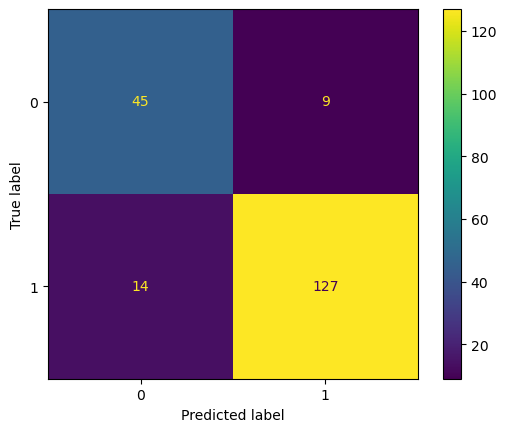

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot() 


print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        54
           1       0.93      0.90      0.92       141

    accuracy                           0.88       195
   macro avg       0.85      0.87      0.86       195
weighted avg       0.89      0.88      0.88       195



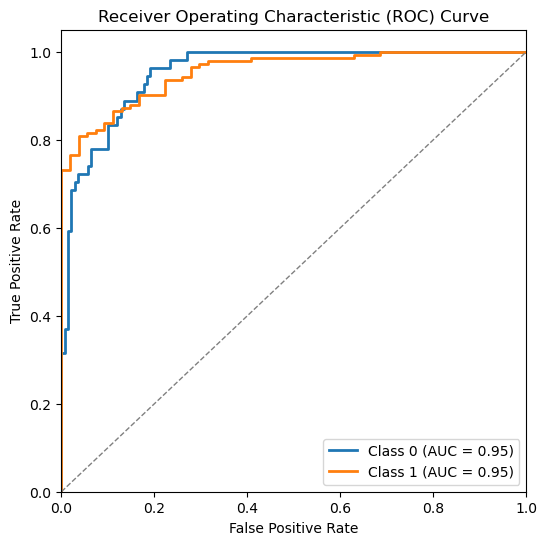

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()